## Part 2: Data Preparation

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

%matplotlib inline

### 2.1: Load and present basic information of the dataset 

In [2]:
df= pd.read_json('Grocery_and_Gourmet_Food.json', lines=True)
df.head().T

,0,1,2,3,4
overall,5,4,4,5,4
verified,True,True,True,True,True
reviewTime,"06 4, 2013","05 23, 2014","05 9, 2014","04 20, 2014","04 16, 2014"
reviewerID,ALP49FBWT4I7V,A1KPIZOCLB9FZ8,A2W0FA06IYAYQE,A2PTZTCH2QUYBC,A2VNHGJ59N4Z90
asin,1888861614,1888861614,1888861614,1888861614,1888861614
reviewerName,Lori,BK Shopper,daninethequeen,Tammara,LaQuinta Alexander
reviewText,Very pleased with my purchase. Looks exactly l...,Very nicely crafted but too small. Am going to...,still very pretty and well made...i am super p...,"I got this for our wedding cake, and it was ev...",It was just what I want to put at the top of m...
summary,Love it,Nice but small,"the ""s"" looks like a 5, kina",Would recommend this to a friend!,Topper
unixReviewTime,1370304000,1400803200,1399593600,1397952000,1397606400
vote,NaN,NaN,NaN,NaN,NaN


In [3]:
# NOTE `.info()` cannot show the `Non-Null Count` column if the data size is too large 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   reviewerName    object
 6   reviewText      object
 7   summary         object
 8   unixReviewTime  int64 
 9   vote            object
 10  image           object
 11  style           object
dtypes: bool(1), int64(2), object(9)
memory usage: 430.7+ MB


In [4]:
# Count Missing Values filled with `NaN` in DataFrame
df.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          355
reviewText           2883
summary              1327
unixReviewTime          0
vote              4414688
image             5003225
style             2798836
dtype: int64

The dataset has __5,074,160 observations and 12 features columns__. 1 of the features is of datatype bool, 2 is of type int64s and 9 are objects. From the `df.isnull().sum()` column we can see quite a few feature columns contain missing values, this will be handled in the next section. 

### Review year visulization

In [56]:
df1 = df.copy()

In [57]:
# convert `reviewTime` into DataTime and 
# get the year, month, and date information
df1['DateTime'] = pd.to_datetime(df1['reviewTime'])
df1['review_year'] = df1['DateTime'].dt.year
df1['review_month'] = df1['DateTime'].dt.month
df1['review_date'] = df1['DateTime'].dt.date

# drop `DateTime`, `reviewTime`, and `unixReviewTime`
df1 = df1.drop(columns=['DateTime','reviewTime','unixReviewTime'])

In [58]:
df1.head(1)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,vote,image,style,review_year,review_month,review_date
0,5,True,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,NaN,NaN,NaN,2013,6,2013-06-04


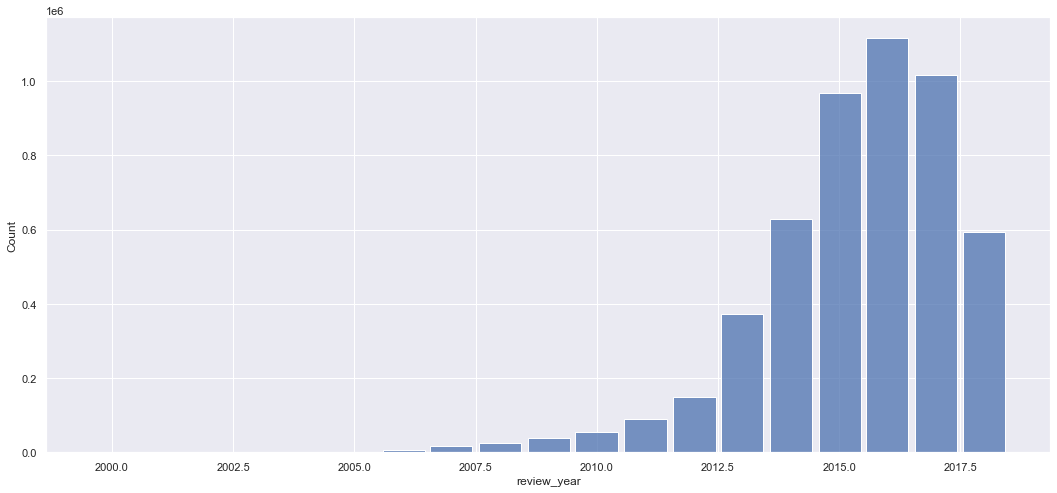

In [107]:
# plot review numbers for each year
plt.rcParams['figure.figsize'] = (18, 8)
sns.histplot(data=df1, x="review_year", shrink=25)
plt.show()

In [59]:
# count review numbers for each year
df1.review_year.value_counts()

2016    1115973
2017    1016760
2015     967538
2014     627657
2018     593405
2013     371483
2012     149791
2011      88599
2010      53756
2009      39578
2008      25541
2007      17881
2006       4967
2005        818
2004        297
2003         95
2002         14
2001          4
2000          3
Name: review_year, dtype: int64

In [110]:
print("The percentage of number of reviews droping from year 2016 in year 2017")
abs ( len (df1[df1.review_year==2017]) - len (df1[df1.review_year==2016])) / len (df1[df1.review_year==2016])

The percentage of number of reviews droping from year 2016 in year 2017


0.08890268850590471

In [106]:
df1[df1.review_year==2018].review_month.value_counts()

3     101260
1      96818
4      94802
2      90609
5      78227
6      60734
7      41051
8      22458
9       7361
10        85
Name: review_month, dtype: int64

**Bascially, the number of reviews increase with the year, except the year of 2017, where it drops about 8.9% from year 2016. What's more, from the review year of 2018 (see above), we can see that there are missing data for the months of 10, 11, and 12.**

### Review vote visulization

In [72]:
df2 = df1.copy()

In [74]:
# convert `vote` from `obj` to `str`, 
# replace `NaN` with 0
# convert to `int`
df2['vote'] = df2['vote'].str.replace(',', '').replace(np.nan, 0).astype(int)

In [76]:
df2.describe()

,overall,vote,review_year,review_month
count,5.074160e+06,5.074160e+06,5.074160e+06,5.074160e+06
mean,4.314708e+00,8.295479e-01,2.015368e+03,6.199218e+00
std,1.249303e+00,1.206719e+01,2.005883e+00,3.505158e+00
min,1.000000e+00,0.000000e+00,2.000000e+03,1.000000e+00
25%,4.000000e+00,0.000000e+00,2.014000e+03,3.000000e+00
50%,5.000000e+00,0.000000e+00,2.016000e+03,6.000000e+00
75%,5.000000e+00,0.000000e+00,2.017000e+03,9.000000e+00
max,5.000000e+00,1.217400e+04,2.018000e+03,1.200000e+01


In [77]:
len(df2[df2['vote']==0])/len(df2)

0.8700332665899381

**From above `vote` colum, we can see that there is big gap between minimum and maximum value of vote: one is 0, the other is 12,174. This means there are some outliers in the vote, which need to remove in the data clearning to precede data model. In addition, 87% reviews have 0 vote, which might indicate most of reviews are not helpful.**

* <font color ='red'> make a table to summary the number of vote and percentage shown below </font>
* <font color ='red'> make a pie chart to summary the number of vote and percentage shown below </font>
* <font color ='red'> word cloud to show the review with vote than more 1000, what do you oberve? </font>

In [95]:
print("Number of reviews vote >= 1000:",len(df2[df2['vote']>=1000]))
len(df2[df2['vote']>1000])/len(df2)

Number of reviews vote >= 1000: 68


1.3401232913428035e-05

In [96]:
print("500 < reviews vote < 1000:",len(df2[ (df2['vote']>500) & (df2['vote']<1000)]))
len(df2[ (df2['vote']>500) & (df2['vote']<1000)]) / len(df2)

500 < reviews vote < 1000: 117


2.305800368928059e-05

In [98]:
print("250 < reviews vote < 500:",len(df2[ (df2['vote']>250) & (df2['vote']<500)]))
len(df2[ (df2['vote']>250) & (df2['vote']<500)]) / len(df2)

250 < reviews vote < 500: 419


8.25752439812698e-05

In [99]:
print("100 < reviews vote < 250:",len(df2[ (df2['vote']>100) & (df2['vote']<250)]))
len(df2[ (df2['vote']>100) & (df2['vote']<250)]) / len(df2)

100 < reviews vote < 250: 1994


0.0003929714474908162

In [100]:
print("0 < reviews vote < 100:",len(df2[ (df2['vote']>0) & (df2['vote']<100)]))
len(df2[ (df2['vote']>0) & (df2['vote']<100)]) / len(df2)

0 < reviews vote < 100: 656832


0.12944645024989357

<AxesSubplot:ylabel='vote'>

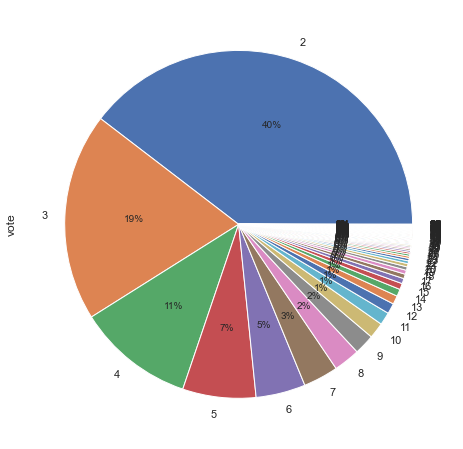

In [83]:
df2[(df2['vote']>0) & (df2['vote']<100) ].vote.value_counts().plot(kind='pie',autopct='%1.0f%%')

In [ ]:
df.vote.sort_values(ascending=False)

### Review verified visualization
* Plot the dist of overall score for verified and non-verified review

In [ ]:
profile = ProfileReport(df, title="The Amazon reveiw dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

In [ ]:
print(df[df.vote=='12174'].reviewText.values[0])

In [ ]:
df[df.vote=='12174']

In [ ]:
# df.drop(columns=['unixReviewTime'])

In [ ]:
df.head(3)

In [ ]:
df['DateTime'] = pd.to_datetime(df['reviewTime'])

In [ ]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month

In [ ]:
df.verified.value_counts()

In [ ]:
df[df.verified==False].year.value_counts()

In [ ]:
## create pandas profiler output 
profile = ProfileReport(df, title="The Amazon Grocery and Gourmet Food review dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()